In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.shape

(100, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)    # use to drop the column
print("hello")

hello


In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


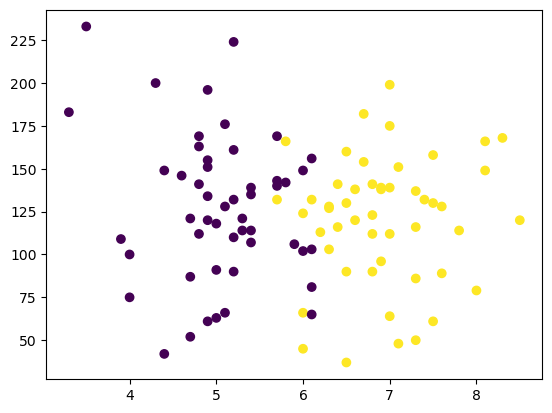

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [9]:
X = df.iloc[:,0:2]
y=df.iloc[:,-1]
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [11]:
X_train
y_train
X_test
y_test

13    1
22    0
58    1
6     0
60    1
55    1
91    1
57    1
48    1
94    0
Name: placement, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler=StandardScaler()

In [14]:
X_train=scaler.fit_transform(X_train)

In [15]:
X_train

array([[-1.18914167e-01,  1.03111758e+00],
       [ 6.77122817e-01,  1.42486177e+00],
       [ 8.54019925e-01,  3.42065260e-01],
       [-6.49605489e-01,  2.45844025e+00],
       [ 5.79829408e-02, -1.94657281e+00],
       [ 5.79829408e-02,  6.12764386e-01],
       [-5.61156936e-01, -2.48551016e-01],
       [ 1.46431495e-01, -1.45439258e+00],
       [-1.44564247e+00,  1.86782397e+00],
       [ 7.65571371e-01,  4.15892294e-01],
       [ 9.42468478e-01,  1.84321496e+00],
       [-6.49605489e-01,  9.08072524e-01],
       [-2.07362720e-01,  1.94411191e-01],
       [-7.38054043e-01,  9.59751448e-02],
       [-4.72708382e-01, -4.20814097e-01],
       [-8.26502597e-01, -8.14558281e-01],
       [ 8.54019925e-01, -6.91513223e-01],
       [-5.61156936e-01, -7.62879356e-02],
       [-9.14951151e-01,  1.76938793e+00],
       [-1.18914167e-01,  4.40501306e-01],
       [-9.14951151e-01,  6.61982409e-01],
       [ 1.91540257e+00,  1.03111758e+00],
       [ 6.77122817e-01,  7.35809444e-01],
       [-9.

In [16]:
X_test = scaler.fit_transform(X_test)

In [17]:
X_test

array([[-0.09300817, -0.09611875],
       [-1.48813066,  0.03645884],
       [ 1.3951225 , -1.32246142],
       [-0.74406533,  0.79877995],
       [ 0.37203267,  0.66620237],
       [ 1.20910616, -0.16240754],
       [ 0.93008166,  1.2959459 ],
       [ 0.        ,  0.3679028 ],
       [ 0.09300817,  0.63305797],
       [-1.674147  , -2.21736012]])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf=LogisticRegression()

In [20]:
clf.fit(X_train,y_train)    # model training

LogisticRegression()

In [21]:
y_pred=clf.predict(X_test)

In [22]:
y_test

13    1
22    0
58    1
6     0
60    1
55    1
91    1
57    1
48    1
94    0
Name: placement, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.8

In [25]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

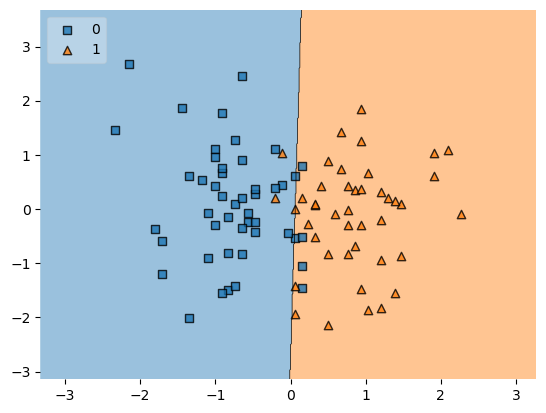

In [29]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


In [31]:
import pickle

In [32]:
pickle.dump(clf,open('model.pkl','wb'))